# AJUSTE DE CURVA (*CURVE FITTING*)

### Via Scipy - "curve_fit"

Muitas vezes, ao lidarmos com dados, nos deparamos com situações nais quais é necessário traçar uma curva que se encaixe aos dados do problema. Este é o mesmo conceito dos modelos de regressão por *Machine Learning*, e para a maioria dos casos o uso das bibliotecas de ML é mais simples e indicado. Inclusive, serão propostos exercícios de comparação entre resultados de regressão utilizando bibliotecas próprias para este fim e métodos iterativos de otimização. O uso de ferramentas específicas de *fitting* se dá quando há a o conhecimento sobre qual a equação da função esperada, ou quando se trablha com funções complexas não-lineares. Partindo deste princípio, iniciaremos fazendo uso do módulo **[curve-fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)**, da biblioteca Scipy;

In [7]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

O módulo curve fit possui como finalidade a aproximação iterativa dos parâmetros de determinada função, através do método dos **[mínimos quadrados](https://pt.wikipedia.org/wiki/M%C3%A9todo_dos_m%C3%ADnimos_quadrados)**. Dessa forma, são realizadas iterações em busca do melhor resultado para as constantes desconhecidas da equação. Para verificar como o mesmo funciona, façamos o teste na prática. De início, será utilizada uma base composta de apenas duas variáveis conhecidas X e Y, obtida como parte complementar de um modelo construído para marketing science:

In [5]:
x=[1.029,6.020,6.433,6.128,7.608,6.655,8.617,8.359,6.990,11.220,5.868,11.032,8.578,6.186,9.447,9.940,8.290,5.808]
y=[0.018,1.427,1.666,1.488,2.407,1.800,3.077,2.905,2.009,4.723,1.343,4.614,3.051,1.521,3.627,3.945,2.859,1.310]

Vejamos como os dados se comportam em um gráfico:

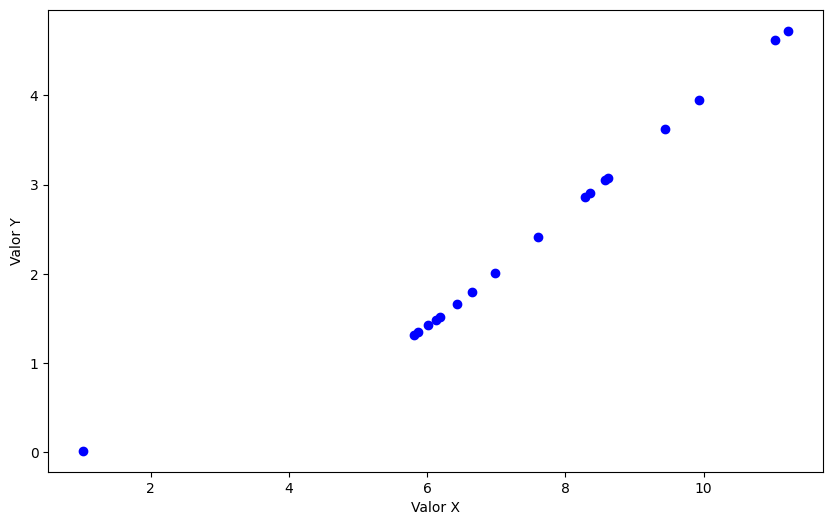

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x,y,'ob')
ax.set_xlabel('Valor X')
ax.set_ylabel('Valor Y')
plt.show()

O modelo mais comum de ajuste é feito buscando um ajuste linear, onde o foco é a curva definida por uma equação linear que mais se adeque aos dados. É possível fazer o teste com algumas curvas conhecidas, buscando encontrar a melhor aproximação para a distribuição dos dados. Será criada uma função para cada equação, que traz como input o valor de X e os demais parâmetros (como argumentos) e como output o valor de Y, representado como o valor resultante da equação em si.

In [29]:
def linear(x,a,b):
    return (a*x+b)

def quadratica(x,a,b,c):
    return (a*(x**2)+b*x+c)

def cubica(x,a,b,c,d):
    return (a*(x**3)+b*(x**2)+c*x+d)

def exponencial(x,a,b):
    return (a**x)+b

#Os betas (parâmetros) das equações podem ser declarados como argumentos (*args), mas isso faz necessário a declaração de uma lista com chutes iniciais para cada parâmetro na chamada da função curve_fit através de uma variável "p0".

Para determinar o valor de cada constante, é possível chamar a função curve_fit carregada anteriormente, que recebe como input a função que se deseja ajustar e os valores de x e y, além de possíveis parâmetros adicionais como chutes iniciais para os betas, tipo de aproximação e limites da curva.

In [22]:
fit_linear=curve_fit(linear,x,y)
print(fit_linear)

[ 0.51746396 -1.42543348]


Percebe-se que ou output são dois vetores, com dimensões 1 e 2 respectivamente. O primeiro trata-se dos melhores valores encontrados para os parâmetros da função data, obtidos minimizando a soma dos quadrados dos resíduos do ajuste. Desta forma, pode-se dizer que a reta que melhor se ajusta aos pontos dados anteriormente é definida por ***f(x)=0.51746396X-1,42543348*** .O segundo vetor traz a matriz da covariância, sendo a covariância dos parâmetros dada por suas diagonais. Costumeiramente, usa-se apenas o valor dos parâmetros para fins de ajuste. O mesmo procedimento será então realizado para todas as curvas, e os parâmetros obtidos serão utilizados para calcular o Y ajustado para cada valor de X.

In [30]:
fit_linear,_=curve_fit(linear,x,y) 
fit_quad,_=curve_fit(quadratica,x,y)
fit_cub,_=curve_fit(cubica,x,y)
fit_exp,_=curve_fit(exponencial,x,y)

#a ",_" na variável indica a criação de uma tupla para receber o valor dos vetores resultantes da função de fitting. Desta forma, a variável "fit" recebe apenas o primeiro vetor, enquanto o segundo é alocado a uma variável qualquer "_".

y_ajust_linear=[linear(valor,fit_linear[0],fit_linear[1]) for valor in x]
y_ajust_quad=[quadratica(valor,fit_quad[0],fit_quad[1],fit_quad[2]) for valor in x]
y_ajust_cub=[cubica(valor,fit_cub[0],fit_cub[1],fit_cub[2],fit_cub[3]) for valor in x]
y_ajust_exp=[exponencial(valor,fit_exp[0],fit_exp[1]) for valor in x]

Com estes valores em mãos, é possível plotar os valores ajustados juntamente aos valores reais, para verificar a aderência de cada curva aos pontos originais:

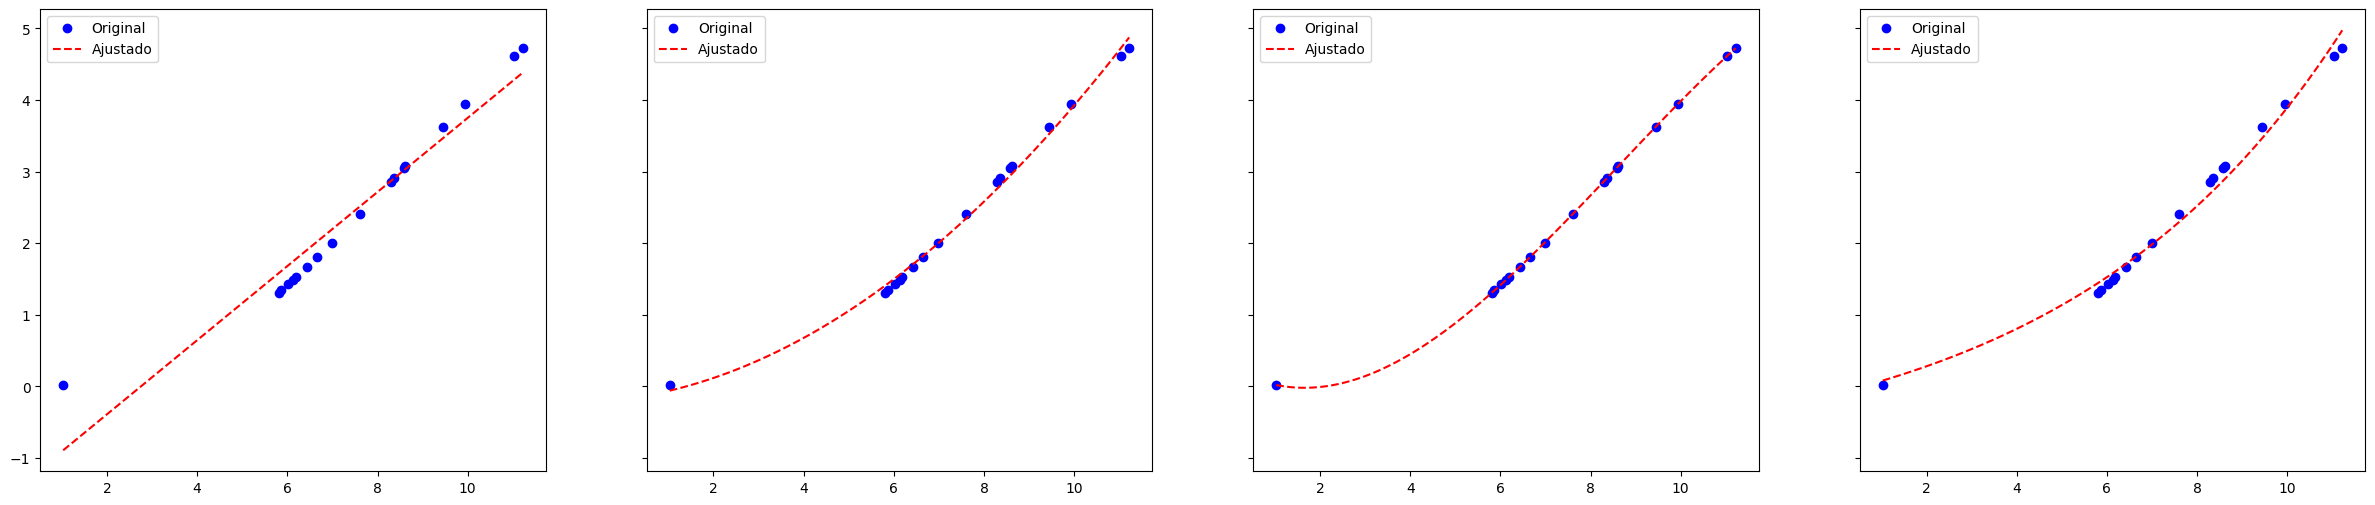

In [32]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharey=True, figsize=(30,6))
ax1.plot(x,y,'ob', label='Original')
ax1.plot(np.linspace(min(x),max(x),100),[linear(valor,fit_linear[0],fit_linear[1]) for valor in np.linspace(min(x),max(x),100)],'--r', label='Ajustado')
ax1.legend()
ax2.plot(x,y,'ob', label='Original')
ax2.plot(np.linspace(min(x),max(x),100),[quadratica(valor,fit_quad[0],fit_quad[1],fit_quad[2]) for valor in np.linspace(min(x),max(x),100)],'--r', label='Ajustado')
ax2.legend()
ax3.plot(x,y,'ob', label='Original')
ax3.plot(np.linspace(min(x),max(x),100),[cubica(valor,fit_cub[0],fit_cub[1],fit_cub[2],fit_cub[3]) for valor in np.linspace(min(x),max(x),100)],'--r', label='Ajustado')
ax3.legend()
ax4.plot(x,y,'ob', label='Original')
ax4.plot(np.linspace(min(x),max(x),100),[exponencial(valor,fit_exp[0],fit_exp[1]) for valor in np.linspace(min(x),max(x),100)],'--r', label='Ajustado')
ax4.legend()
plt.show()

Ao se analisar visualmente os resultados das curvas ajustadas, percebe-se uma boa aproximação das curvas quadrática e exponencial, e o melhor resultado na curva de grau 3. Este resultado é compreensível e esperado, uma vez que quanto maior o grau de uma equação polinomial, maior é sua capacidade de se adequar aos pontos dados. Na prática, quanto maior o grau de uma curva, mais pontos de inflexão ela apresenta, podendo mudar de sentido várias vezes para buscar um melhor ajuste. Este resultado em boa parte das vezes **não é recomendado**, uma vez que um ajuste tão preciso captura também os ruídos da base, levando a um overfitting e consequentemente à perda do poder de generalização. Para verificar o ajuste de cada curva matematicamente, é possível calcular algumas métricas com base nos valores reais de Y contra os valores de Y obtidos pelas curvas ajustadas.

Para este caso, serão avaliadas as métricas R², MAE, MAPE e RMSE, que tem por definição:

- R²: Coeficiente de determinação, indica o percentual da variância dos dados originais que é explicada pelos dados ajustados. É uma métrica interessante para verificar a aproximação da curva gerada ao padrão dos dados, mas não deve ser utilizado como a única medida para determinar se um ajuste está bom ou não. 

    >Para casos de regressão múltipla (com mais de uma variável), é necessário substituir o R² pelo **R² ajustado**, que ajusta o resultado de acordo com a quantidade de variáveis. Aqui, por se tratar de uma regressão simples, é utilizada a métrica original.

- MAE: *Mean Absolute Error*, ou Erro Médio Absoluto, determina a média do somatório absoluto dos resíduos, ou seja, a média dos erros absolutos de cada ponto original contra o calculado. É útil ao se avaliar valores pequenos, para os quais métricas percentuais trariam resultados distorcidos mesmo com resíduos de baixo valor.

- MAPE: *Mean Absolute Percentage Error*, ou Erro Médio Percentual Absoluto, é semelhante ao MAE mas traz os valores em base percentual. É útil ao se avaliar valores grandes, para os quais métricas absolutas trariam grandes valores, mesmo se tratando de uma variação percentual pequena.

- RMSE: *Root Mean Squared Error*, ou Raiz do Erro Quadrático Médio é uma métrica auxiliar para determinar o ajuste da curva. Esta métrica penaliza grandes erros, ajudando a detectar a presença de *outliers* não captados pela curva. 


In [ ]:
def erro(y_real,y_calculado):
    r_quad=1-(sum([(y_real[k]-y_calculado[k])**2] for k in range(len(y_real)))/sum([(y_real[j]-np.mean(y_calculado))**2 for j in range(len(y_real))]))
    mape=np.mean(sum([abs((y_real[k]-y_calculado[k])/y_real[k]) for k in range(len(y_real))]))
    mae=np.mean(sum([abs(y_real[k]-y_calculado[k]) for k in range(len(y_real))]))
    rmse=np.mean(sum([(y_real[k]-y_calculado[k])**2 for k in range(len(y_real))]))
    
    
#fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8)=plt.subplots(2,4,sharex=True)
#ax1.plot()

In [13]:
residuos=[abs(y_real[k]-y_calculado[k]) for k in range (len(y_real))]

(array([ 0.51746396, -1.42543348]),
 array([[ 0.00107199, -0.00799278],
        [-0.00799278,  0.06525893]]))